In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

# Exploring the Initial Dataset

In [2]:
data = pd.read_csv("TSP_instances.csv", delimiter=",")
print(str(data.shape[0]) + " rows,", len(data.columns), "columns")
data.sample(5)

2036 rows, 29 columns


,instance_size,tenure,hood_size,selecetd_cities,selected_coordinates,initial_sol,improved_sol,initial_cost_km,improved_cost_km,improvement,...,avg_silhouette,std_dev_cluster_sizes,avg_cluster_density,avg_cluster_perimeter,avg_cluster_area,avg_cluster_complexity,eps_exec_time,dbscan_exec_time,nn_exec_time,tabu_exec_time
560,79,14,29,"['Lomma', 'Kalmar', 'Kungsbacka', 'Staffanstor...","{'Lomma': (55.6667, 13.0833), 'Kalmar': (56.66...","['Örebro', 'Marieberg', 'Ekeby', 'Torshälla', ...","['Ekeby', 'Marieberg', 'Örebro', 'Torshälla', ...",5949.133,5659.216,289.917,...,NaN,0.0,2.573868,21.441425,29.527544,3.945845,0.001993,0.002996,0.000997,0.046837
1069,83,20,40,"['Vaxholm', 'Ekerö', 'Arvika', 'Stenungsund', ...","{'Vaxholm': (59.4167, 18.3167), 'Ekerö': (59.2...","['Södertälje', 'Tumba', 'Huddinge', 'Jordbro',...","['Södertälje', 'Tumba', 'Huddinge', 'Jordbro',...",4871.990,4777.093,94.897,...,0.553633,2.5,6.557311,10.062992,5.742638,4.200139,0.134640,0.138629,0.000000,0.067822
40,45,18,18,"['Tyresö', 'Kållered', 'Ljunghusen', 'Billdal'...","{'Tyresö': (59.2333, 18.3), 'Kållered': (57.6,...","['Stockholm', 'Solna', 'Djursholm', 'Täby', 'S...","['Solna', 'Stockholm', 'Djursholm', 'Täby', 'S...",3728.403,3580.511,147.892,...,0.612466,3.5,5.353187,9.365354,5.142280,4.440965,0.127698,0.130652,0.000997,0.018945
1740,44,10,17,"['Kållered', 'Lysekil', 'Södertälje', 'Nynäsha...","{'Kållered': (57.6, 12.05), 'Lysekil': (58.283...","['Gothenburg', 'Mölnlycke', 'Kållered', 'Särö'...","['Gothenburg', 'Mölnlycke', 'Kållered', 'Särö'...",3818.582,3491.970,326.612,...,0.551260,2.5,4.205990,9.435333,4.856471,4.286510,0.000998,0.003990,0.000000,0.018982
1211,65,17,27,"['Linköping', 'Falun', 'Kållered', 'Solna', 'S...","{'Linköping': (58.4158, 15.6253), 'Falun': (60...","['Linköping', 'Nyköping', 'Rönninge', 'Tulling...","['Söderhamn', 'Gävle', 'Uppsala', 'Tullinge', ...",5471.715,5090.162,381.553,...,NaN,0.0,2.482865,19.246400,24.568389,3.882944,0.130651,0.132612,0.000000,0.037899


In [3]:
print(str(data.shape[0]) + " rows,", len(data.columns), "columns")

2036 rows, 29 columns


In [4]:
# check if any none/null values
data.isna().sum()

instance_size                      0
tenure                             0
hood_size                          0
selecetd_cities                    0
selected_coordinates               0
initial_sol                        0
improved_sol                       0
initial_cost_km                    0
improved_cost_km                   0
improvement                        0
DBSCAN_min_sample                  0
DBSCAN_eps                         0
cluster_IDs                        0
cluster_sizes                      0
n_clusters                         0
n_noise_points                     0
avg_inter_cluster_distance_km    990
min_inter_cluster_distance_km    990
max_inter_cluster_distance_km    990
avg_silhouette                   990
std_dev_cluster_sizes              0
avg_cluster_density                0
avg_cluster_perimeter              0
avg_cluster_area                   0
avg_cluster_complexity             0
eps_exec_time                      0
dbscan_exec_time                   0
n

In [5]:
# Look at the information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036 entries, 0 to 2035
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   instance_size                  2036 non-null   int64  
 1   tenure                         2036 non-null   int64  
 2   hood_size                      2036 non-null   int64  
 3   selecetd_cities                2036 non-null   object 
 4   selected_coordinates           2036 non-null   object 
 5   initial_sol                    2036 non-null   object 
 6   improved_sol                   2036 non-null   object 
 7   initial_cost_km                2036 non-null   float64
 8   improved_cost_km               2036 non-null   float64
 9   improvement                    2036 non-null   float64
 10  DBSCAN_min_sample              2036 non-null   int64  
 11  DBSCAN_eps                     2036 non-null   float64
 12  cluster_IDs                    2036 non-null   o

In [6]:
# Look at the information about each columns and its dataset
data.describe()

,instance_size,tenure,hood_size,initial_cost_km,improved_cost_km,improvement,DBSCAN_min_sample,DBSCAN_eps,n_clusters,n_noise_points,...,avg_silhouette,std_dev_cluster_sizes,avg_cluster_density,avg_cluster_perimeter,avg_cluster_area,avg_cluster_complexity,eps_exec_time,dbscan_exec_time,nn_exec_time,tabu_exec_time
count,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.0,2036.000000,2036.000000,2036.000000,...,1046.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000
mean,62.525049,12.411591,26.293222,4846.948226,4539.177549,307.770677,4.0,1.429107,1.666012,4.084479,...,0.466404,7.509433,29.985453,13.695731,14.374236,4.942510,0.052776,0.055849,0.000460,0.055289
std,31.537051,6.800386,14.441068,1384.773596,1335.764040,279.136310,0.0,0.504091,0.762412,2.575014,...,0.160773,14.770944,54.750466,6.395010,10.336087,1.411642,0.067279,0.067325,0.000518,0.051591
min,10.000000,5.000000,5.000000,1414.449000,1264.111000,0.000000,4.0,0.294888,1.000000,0.000000,...,-0.143786,0.000000,0.395448,0.790227,0.030929,3.790987,0.000000,0.001860,0.000000,0.002957
25%,35.000000,6.000000,14.000000,3806.456750,3475.119000,123.901000,4.0,1.114153,1.000000,2.000000,...,0.284575,0.000000,2.573147,8.439275,4.640885,4.052632,0.000998,0.003010,0.000000,0.013964
50%,63.000000,11.000000,26.000000,5088.430000,4770.550000,230.079000,4.0,1.275451,2.000000,4.000000,...,0.519732,0.000000,3.840948,11.705687,12.696002,4.259957,0.001995,0.005014,0.000000,0.039893
75%,91.000000,17.000000,38.000000,6042.723000,5709.505000,396.906500,4.0,1.684964,2.000000,5.250000,...,0.581372,4.804920,15.735116,19.741256,24.561319,5.072617,0.130653,0.133643,0.000997,0.081757
max,116.000000,30.000000,57.000000,7880.831000,7517.783000,2065.363000,4.0,5.018382,5.000000,18.000000,...,0.805435,52.500000,240.701128,30.006726,36.921428,13.274108,0.305184,0.309173,0.002992,0.325130


# Checking for Duplicates

In [7]:
duplicates = data[data.duplicated(keep=False)]

if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:", len(duplicates))
    data.drop_duplicates(keep="first", inplace=True)

No duplicates found.


In [8]:
# another way to check duplicates based on number of cities and the chosen cities

# Initial number of rows
initial_row_count = len(data)

# Sorting the cities in each list to normalize the order
data["cities_sorted"] = data["selecetd_cities"].apply(lambda x: tuple(sorted(x)))

# Grouping the DataFrame based on sorted cities and city_count
grouped = data.groupby(["cities_sorted", "instance_size"])


# For each group, keep the row with the maximum 'improvement'
def filter_rows(group):
    if len(group) > 1:
        return group[group["improvement"] == group["improvement"].max()]
    return group


# Apply the filtering function and reset index
filtered_df = grouped.apply(filter_rows).reset_index(drop=True)

# Drop the added column
filtered_df.drop(columns=["cities_sorted"], inplace=True)

# Calculate the number of rows dropped
rows_dropped = initial_row_count - len(filtered_df)
rows_remaining = len(filtered_df)

print(f"Original number of rows: {initial_row_count}")
print(f"Number of rows dropped: {rows_dropped}")
print(f"Number of rows remaining: {rows_remaining}")

Original number of rows: 2036
Number of rows dropped: 0
Number of rows remaining: 2036


# Dropping Rows With Null Values

In [9]:
# Handling null values appropriately
clean_data = filtered_df.dropna()
print("remaining rows: " + str(clean_data.shape[0]) + " rows,", len(clean_data.columns), "columns")

remaining rows: 1046 rows, 29 columns


## Getting the Results For Time Calculations After Cleaning

In [10]:
# Look at the information about each columns and its dataset
clean_data.describe()

,instance_size,tenure,hood_size,initial_cost_km,improved_cost_km,improvement,DBSCAN_min_sample,DBSCAN_eps,n_clusters,n_noise_points,...,avg_silhouette,std_dev_cluster_sizes,avg_cluster_density,avg_cluster_perimeter,avg_cluster_area,avg_cluster_complexity,eps_exec_time,dbscan_exec_time,nn_exec_time,tabu_exec_time
count,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.0,1046.000000,1046.000000,1046.000000,...,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000
mean,60.185468,12.196941,25.355641,4620.319935,4337.402311,282.917624,4.0,1.263413,2.296367,4.719885,...,0.466404,14.616832,55.484295,8.144656,5.703042,5.723528,0.056012,0.060076,0.000445,0.057507
std,33.390570,6.916275,15.138838,1433.885933,1408.769731,246.842734,0.0,0.429084,0.560354,2.761479,...,0.160773,17.913440,66.755624,2.898366,4.087269,1.599449,0.068716,0.068631,0.000524,0.060674
min,10.000000,5.000000,5.000000,1414.449000,1264.111000,0.000000,4.0,0.313136,2.000000,0.000000,...,-0.143786,0.000000,1.671527,0.790227,0.030929,3.900011,0.000000,0.002957,0.000000,0.002959
25%,30.000000,5.000000,12.000000,3414.765500,3148.325750,117.493000,4.0,1.046233,2.000000,3.000000,...,0.284575,1.500000,5.924375,6.220162,2.002045,4.453154,0.000998,0.004952,0.000000,0.010994
50%,57.000000,11.000000,23.000000,4746.399500,4373.031000,215.123000,4.0,1.168197,2.000000,5.000000,...,0.519732,4.500000,14.076281,8.744330,4.970003,4.989940,0.001995,0.006981,0.000000,0.033909
75%,91.750000,17.000000,38.000000,5991.522250,5681.659500,372.563250,4.0,1.428451,2.000000,6.000000,...,0.581372,25.000000,117.486382,10.526221,9.492262,7.043445,0.131632,0.135629,0.000997,0.082771
max,116.000000,30.000000,57.000000,7612.023000,7366.570000,1706.532000,4.0,3.463876,5.000000,18.000000,...,0.805435,52.500000,240.701128,13.571123,12.989040,13.274108,0.305184,0.309173,0.002992,0.325130


In [11]:
time_data = clean_data.copy()
# Create bins for instance_size from 0 to max size in intervals of 10
bins = range(0, time_data["instance_size"].max() + 10, 10)
labels = [f"{i}-{i+10}" for i in bins[:-1]]

time_data["size_range"] = pd.cut(
    time_data["instance_size"], bins=bins, labels=labels, right=False
)

# Uncomment to get not only the average of all instance_size groups but also the min and max times
# eps_grouped = time_data.groupby("size_range")["eps_exec_time"].agg(
#     ["mean", "min", "max"]
# )
# dbscan_grouped = time_data.groupby("size_range")["dbscan_exec_time"].agg(
#     ["mean", "min", "max"]
# )
# nn_grouped = time_data.groupby("size_range")["nn_exec_time"].agg(["mean", "min", "max"])
# tabu_grouped = time_data.groupby("size_range")["tabu_exec_time"].agg(
#     ["mean", "min", "max"]
# )

# Now group by 'size_range' and calculate mean
eps_grouped = time_data.groupby("size_range")["eps_exec_time"].agg(
    ["mean"]
)
dbscan_grouped = time_data.groupby("size_range")["dbscan_exec_time"].agg(
    ["mean"]
)
nn_grouped = time_data.groupby("size_range")["nn_exec_time"].agg(["mean"])
tabu_grouped = time_data.groupby("size_range")["tabu_exec_time"].agg(
    ["mean"]
)


print("eps", eps_grouped)
print("dbscan", dbscan_grouped)
print("nn", nn_grouped)
print("tabu", tabu_grouped)

eps                 mean
size_range          
0-10             NaN
10-20       0.046990
20-30       0.058066
30-40       0.050426
40-50       0.058244
50-60       0.055177
60-70       0.056833
70-80       0.063660
80-90       0.059829
90-100      0.063621
100-110     0.054479
110-120     0.057101
dbscan                 mean
size_range          
0-10             NaN
10-20       0.051348
20-30       0.061559
30-40       0.053952
40-50       0.061891
50-60       0.058958
60-70       0.060719
70-80       0.067408
80-90       0.063658
90-100      0.068154
100-110     0.059296
110-120     0.062322
nn                 mean
size_range          
0-10             NaN
10-20       0.000073
20-30       0.000187
30-40       0.000263
40-50       0.000311
50-60       0.000294
60-70       0.000364
70-80       0.000428
80-90       0.000604
90-100      0.000761
100-110     0.000887
110-120     0.001005
tabu                 mean
size_range          
0-10             NaN
10-20       0.005479
20-30       0.0

## Visually Exploring the Data After Cleaning

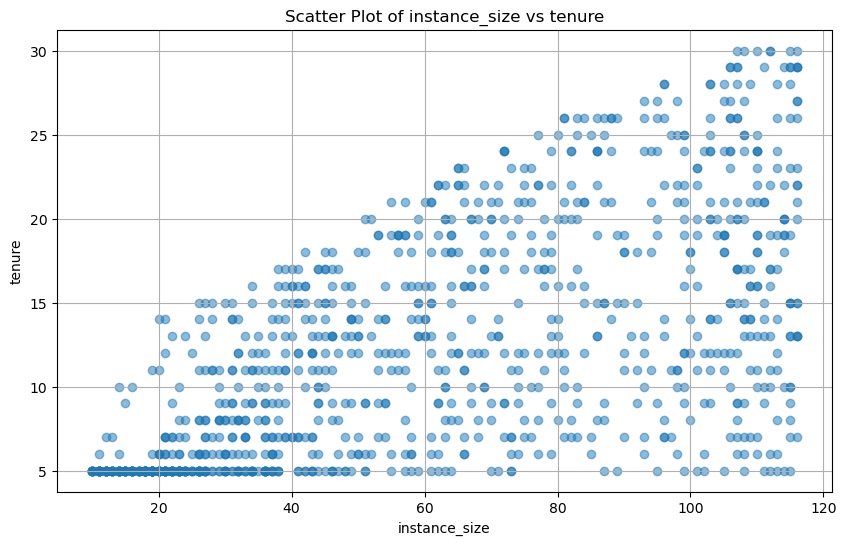

In [12]:
x = clean_data["instance_size"]
y = clean_data["tenure"]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title("Scatter Plot of instance_size vs tenure")
plt.xlabel("instance_size")
plt.ylabel("tenure")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Count of instances by cluster')

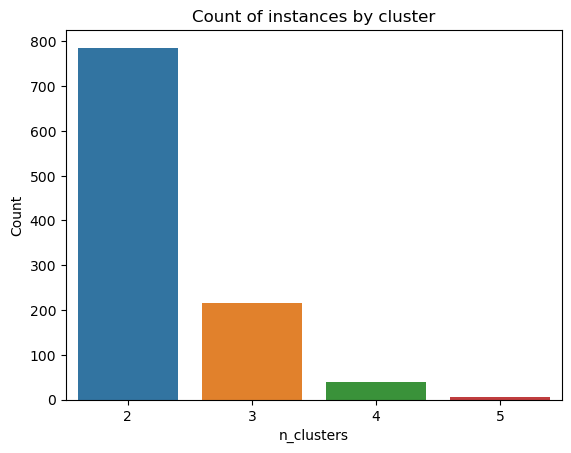

In [13]:
sns.countplot(data=clean_data, x="n_clusters")
plt.xlabel("n_clusters")
plt.ylabel("Count")
plt.title("Count of instances by cluster")

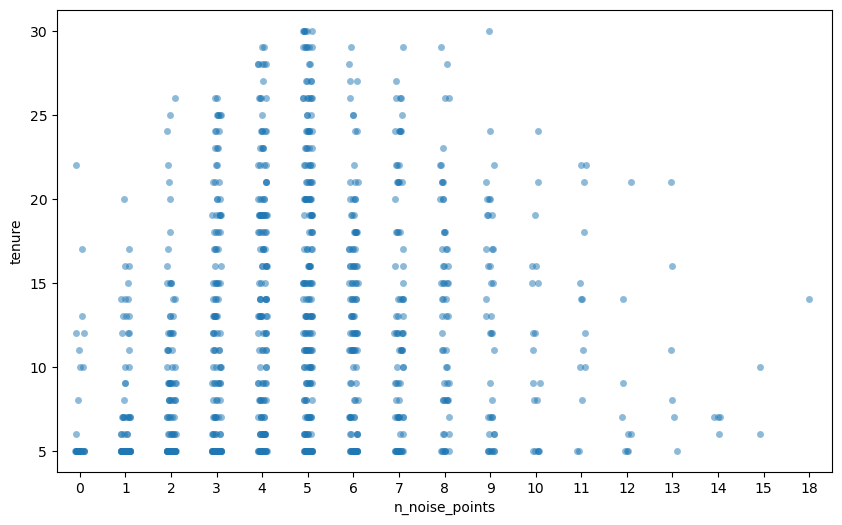

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(
    x=clean_data["n_noise_points"], y=clean_data["tenure"], alpha=0.5, jitter=True, ax=ax
)
plt.show()

## Checking if the Data is Still Balanced After Cleaning

In [15]:
# Count rows where 'instance_size' is less than 60
count_less_than_60 = clean_data[clean_data["instance_size"] < 58].shape[0]

# Count rows where 'instance_size' is more than 60
count_more_than_60 = clean_data[clean_data["instance_size"] > 58].shape[0]

print(f"Number of rows where instance_size is less than 60: {count_less_than_60}")
print(f"Number of rows where instance_size is more than 60: {count_more_than_60}")

Number of rows where instance_size is less than 60: 528
Number of rows where instance_size is more than 60: 510


In [16]:
# the column to analyze
column_name = (
    "instance_size"
)

# Get the unique non-numerical values and their counts in the specified column
unique_values_count = clean_data[column_name].value_counts()

# Get the total number of unique non-numerical values
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'instance_size': 107
Value counts:
110    19
107    19
36     18
115    18
26     18
       ..
94      4
52      3
97      3
85      3
91      1
Name: instance_size, Length: 107, dtype: int64


# Keeping Relevant Features Only

In [17]:
# List of columns to keep including instance_size
columns_to_keep = [
    "instance_size",
    "DBSCAN_eps",
    "n_clusters",
    "n_noise_points",
    "avg_inter_cluster_distance_km",
    "min_inter_cluster_distance_km",
    "max_inter_cluster_distance_km",
    "avg_silhouette",
    "std_dev_cluster_sizes",
    "avg_cluster_density",
    "avg_cluster_perimeter",
    "avg_cluster_area",
    "avg_cluster_complexity",
    "tenure",
]

# List of columns to keep without the instance_size
columns_to_keep2 = [
    "DBSCAN_eps",
    "n_clusters",
    "n_noise_points",
    "avg_inter_cluster_distance_km",
    "min_inter_cluster_distance_km",
    "max_inter_cluster_distance_km",
    "avg_silhouette",
    "std_dev_cluster_sizes",
    "avg_cluster_density",
    "avg_cluster_perimeter",
    "avg_cluster_area",
    "avg_cluster_complexity",
    "tenure",
]

# Create a new DataFrame with only the specified columns (includes instance_size)
new_data = clean_data[columns_to_keep]
print("rows:", new_data.shape[0], "columns:", len(new_data.columns))

# Create a second new DataFrame with only the specified columns (excludes instance_size)
new_data2 = clean_data[columns_to_keep2]
print("rows:", new_data2.shape[0], "columns:", len(new_data2.columns))

rows: 1046 columns: 14
rows: 1046 columns: 13


# Exploring the Correlation of the Features With the Tenure

<AxesSubplot:>

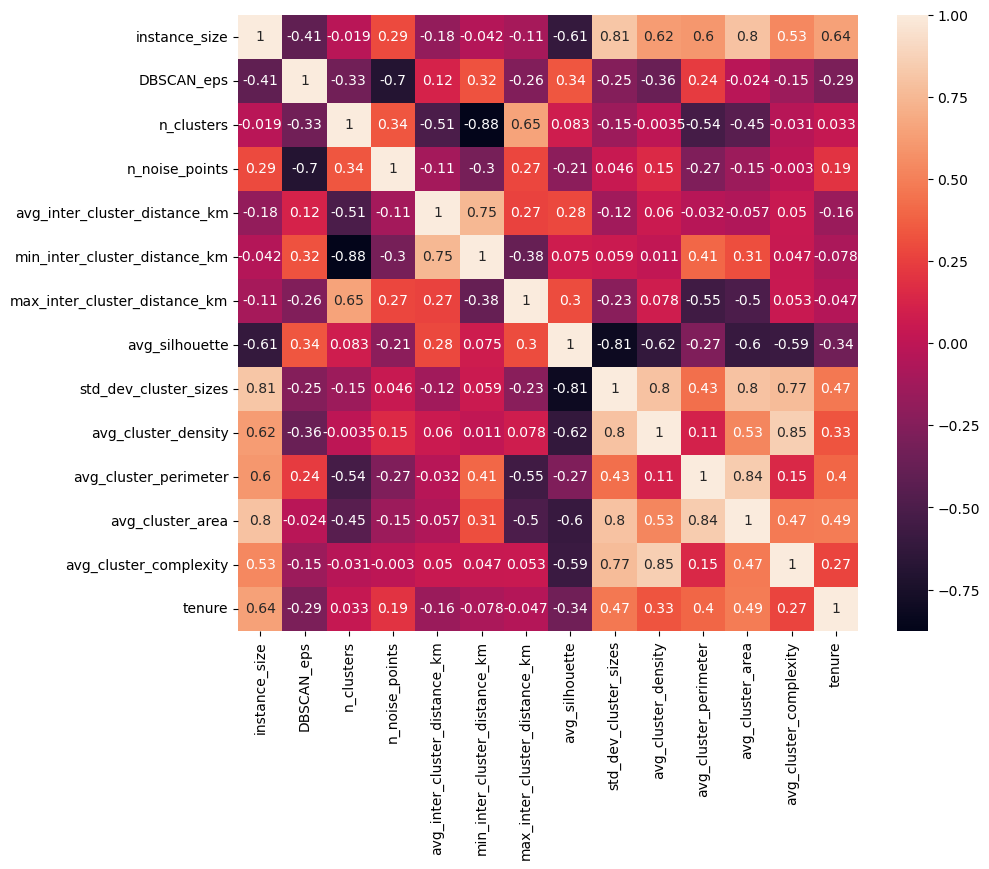

In [18]:
# Creating a heatmap with the features (includes instance_size)
corr = new_data.corr()

# Customize the figure size
plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True)

## Using Lasso Regression to Find Important Features

In [19]:
# Finding most important features for the first dataframe (with instance_size)

X = new_data.drop("tenure", axis=1)
y = new_data["tenure"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 #X_poly_df instead of X if using poly
)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso model
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Display non-zero feature coefficients (those considered useful by Lasso)
coefficients = pd.DataFrame(
    {"Feature": X.columns, "Coefficient": lasso.coef_}
)  # feature_names instead of X.columns if using poly
important_features = coefficients[coefficients["Coefficient"] != 0].sort_values(
    by="Coefficient", ascending=False
)
print("Important Features:\n", important_features)
important_feature_names = important_features["Feature"].tolist()
print(important_feature_names)

Mean Squared Error: 29.873448107935708
Important Features:
                           Feature  Coefficient
0                   instance_size     4.420994
10          avg_cluster_perimeter     0.475382
4   avg_inter_cluster_distance_km     0.211399
7                  avg_silhouette     0.168906
12         avg_cluster_complexity     0.063267
3                  n_noise_points     0.008344
2                      n_clusters    -0.014482
6   max_inter_cluster_distance_km    -0.016333
1                      DBSCAN_eps    -0.464455
5   min_inter_cluster_distance_km    -0.647179
9             avg_cluster_density    -0.701310
['instance_size', 'avg_cluster_perimeter', 'avg_inter_cluster_distance_km', 'avg_silhouette', 'avg_cluster_complexity', 'n_noise_points', 'n_clusters', 'max_inter_cluster_distance_km', 'DBSCAN_eps', 'min_inter_cluster_distance_km', 'avg_cluster_density']


In [20]:
# Finding most important features for the second dataframe (without instance_size)

X = new_data2.drop("tenure", axis=1)
y = new_data2["tenure"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 
)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso model
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Display non-zero feature coefficients (those considered useful by Lasso)
coefficients = pd.DataFrame(
    {"Feature": X.columns, "Coefficient": lasso.coef_}
)
important_features2 = coefficients[coefficients["Coefficient"] != 0].sort_values(
    by="Coefficient", ascending=False
)
print("Important Features:\n", important_features2)
important_feature_names2 = important_features2["Feature"].tolist()
print(important_feature_names2)

Mean Squared Error: 31.398295430369974
Important Features:
                           Feature  Coefficient
9           avg_cluster_perimeter     3.074429
7           std_dev_cluster_sizes     2.698820
2                  n_noise_points     1.085383
6                  avg_silhouette     1.000116
5   max_inter_cluster_distance_km     0.557465
1                      n_clusters     0.428229
10               avg_cluster_area     0.220341
11         avg_cluster_complexity     0.041732
8             avg_cluster_density    -0.477605
4   min_inter_cluster_distance_km    -0.836524
0                      DBSCAN_eps    -1.291383
['avg_cluster_perimeter', 'std_dev_cluster_sizes', 'n_noise_points', 'avg_silhouette', 'max_inter_cluster_distance_km', 'n_clusters', 'avg_cluster_area', 'avg_cluster_complexity', 'avg_cluster_density', 'min_inter_cluster_distance_km', 'DBSCAN_eps']


### Isolating Important Features to be Used With the ML Model

In [21]:
# # uncomment those to try all the features that gave coefficient other than 0
# columns_to_select = important_feature_names + ["tenure"]
# columns_to_select2 = important_feature_names2 + ["tenure"]

# chose to further filter important features (above 0.5 and under -0.5)
columns_to_select = [
    "instance_size",
    "min_inter_cluster_distance_km",
    "avg_cluster_density",
    "tenure",
]

columns_to_select2 = [
    "avg_cluster_perimeter",
    "std_dev_cluster_sizes",
    "avg_silhouette",
    "n_noise_points",
    "max_inter_cluster_distance_km",
    "min_inter_cluster_distance_km",
    "DBSCAN_eps",
    "tenure",
]

important_data = new_data[columns_to_select]
important_data2 = new_data2[columns_to_select2]

# check for and drop any null values
if important_data.isnull().values.any():
    important_data = important_data.dropna()

if important_data2.isnull().values.any():
    important_data2 = important_data2.dropna()

# Creating and Training the ML Model

## Useful Functions

In [22]:
# A function to calculate and print the calculated errors
def print_error(y_pred, y_test):
    MAE = np.mean(abs(y_pred - y_test))
    MAPE = np.mean((np.abs(y_pred - y_test) / y_test)) * 100
    MSE = np.square(np.subtract(y_pred, y_test)).mean()

    print(f"MAE = {MAE:.3f} (Mean Absolute Error)")
    print(f"MAPE = {MAPE:.1f}% (Mean Absolute Percentage Error)")
    print(f"MSE = {MSE:.3f} (Mean Squared Error)")

In [23]:
def print_crossval(scores):
    MAE = -np.mean(scores["test_neg_mean_absolute_error"], axis=0)
    MSE = -np.mean(scores["test_neg_mean_squared_error"])

    print("Results of cross validation:")
    print(f"MAE = {MAE:.3f} (Mean Absolute Error for cross-validation)")
    print(f"MSE = {MSE:.3f} (Mean Squared Error for cross-validation)")

## Implementing Linear Regression on First DataFrame (with instance_size)

In [24]:
X = important_data.drop("tenure", axis=1)  # Drop the target column to isolate features
y = important_data["tenure"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create a linear regression model instance
model = LinearRegression()

# Perform cross-validation
print_crossval(
    cross_validate(model, X_train, y_train, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], cv=10)
)

# Fit (train) the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

print("Results gathered:")
print_error(y_pred, y_test)

Results of cross validation:
MAE = 4.101 (Mean Absolute Error for cross-validation)
MSE = 27.148 (Mean Squared Error for cross-validation)
Results gathered:
MAE = 4.404 (Mean Absolute Error)
MAPE = 42.4% (Mean Absolute Percentage Error)
MSE = 30.043 (Mean Squared Error)


## Implementing Linear Regression on Second DataFrame (without instance_size)

In [25]:
X = important_data2.drop("tenure", axis=1)  # Drop the target column to isolate features
y = important_data2["tenure"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create a linear regression model instance
model = LinearRegression()

# Perform cross-validation
print_crossval(
    cross_validate(model, X_train, y_train, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], cv=10)
)

# Fit (train) the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

print("Results gathered:")
print_error(y_pred, y_test)

Results of cross validation:
MAE = 4.286 (Mean Absolute Error for cross-validation)
MSE = 28.331 (Mean Squared Error for cross-validation)
Results gathered:
MAE = 4.606 (Mean Absolute Error)
MAPE = 45.6% (Mean Absolute Percentage Error)
MSE = 31.477 (Mean Squared Error)
